In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

```python
# Importamos a biblioteca pandas com o alias 'pd' para manipular dados tabulares.
import pandas as pd

# Importamos a biblioteca numpy com o alias 'np' para realizar operações numéricas eficientes.
import numpy as np

# Importamos a biblioteca matplotlib.pyplot com o alias 'plt' para visualizarmos gráficos.
import matplotlib.pyplot as plt

# Importamos a biblioteca seaborn com o alias 'sns' para melhorarmos a visualização de gráficos.
import seaborn as sns

# Importamos a biblioteca plotly.express com o alias 'px' para visualizarmos gráficos interativos.
import plotly.express as px

# Importamos a função 'train_test_split' da biblioteca sklearn.model_selection para dividirmos dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

# Importamos a classe 'RandomForestClassifier' da biblioteca sklearn.ensemble para criarmos um modelo de floresta aleatória.
from sklearn.ensemble import RandomForestClassifier

# Importamos a função 'accuracy_score' e a função 'classification_report' da biblioteca sklearn.metrics
# para avaliarmos o desempenho de modelos de aprendizado de máquina.
from sklearn.metrics import accuracy_score, classification_report

# Importamos a classe 'SimpleImputer' da biblioteca sklearn.impute para preenchermos valores ausentes.
from sklearn.impute import SimpleImputer

# Importamos as funções relacionadas a métricas de avaliação de classificação, como 'confusion_matrix',
# 'roc_curve', 'roc_auc_score' e 'precision_recall_curve' da biblioteca sklearn.metrics.
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# Importamos a função 'SMOTE' da biblioteca imblearn.over_sampling para realizarmos oversampling (aumento de dados).
from imblearn.over_sampling import SMOTE

# Importamos a classe 'RandomUnderSampler' da biblioteca imblearn.under_sampling para realizarmos undersampling (redução de dados).
from imblearn.under_sampling import RandomUnderSampler


In [2]:
df2021 = pd.read_csv("SINASC_2021.csv", sep=';')
df2021

C:\Users\felip_qsiudu4\AppData\Local\Temp\ipykernel_14968\4050373732.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df2021 = pd.read_csv("SINASC_2021.csv", sep=';')


ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  ESCMAE  \
0             1  2515768.0      110010        1      18.0        1.0     4.0   
1             1  2516276.0      110015        1      28.0        2.0     5.0   
2             1  2496879.0      110015        1      32.0        5.0     4.0   
3             1  5618347.0      110020        1      25.0        NaN     3.0   
4             1  5618347.0      110020        1      32.0        2.0     5.0   
...         ...        ...         ...      ...       ...        ...     ...   
2677096       1        NaN      530010        3      33.0        2.0     5.0   
2677097       1    10472.0      530010        1      27.0        1.0     3.0   
2677098       1  7539797.0      530010        1      26.0        2.0     5.0   
2677099       1    10499.0      530010        1      36.0        5.0     4.0   
2677100       1    10510.0      530010        1      30.0        2.0     5.0   

         CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  TPDOCRESP  DTDECLARAC  \
0               NaN         0.0         1.0  ...        3.0   6042021.0   
1               NaN         0.0         0.0  ...        3.0   5022021.0   
2          999992.0         1.0         0.0  ...        5.0  11062021.0   
3          999992.0         4.0         1.0  ...        4.0   2042021.0   
4          999992.0         1.0         2.0  ...        3.0  28062021.0   
...             ...         ...         ...  ...        ...         ...   
2677096    223115.0         1.0         0.0  ...        3.0  19092021.0   
2677097    999992.0         2.0         0.0  ...        4.0   1112021.0   
2677098    212415.0         0.0         0.0  ...        3.0  21092021.0   
2677099    999992.0         2.0         1.0  ...        4.0   1122021.0   
2677100         NaN         1.0         1.0  ...        2.0   8122021.0   

         ESCMAEAGR1  STDNEPIDEM  STDNNOVA  CODPAISRES  TPROBSON  PARIDADE  \
0               5.0         0.0         1         1.0         3         1   
1               8.0         0.0         1         1.0         8         0   
2               6.0         0.0         1         1.0        10         1   
3              11.0         0.0         1         1.0         3         1   
4               7.0         0.0         1         1.0         5         1   
...             ...         ...       ...         ...       ...       ...   
2677096         8.0         0.0         1         1.0         3         1   
2677097        11.0         0.0         1         1.0         3         1   
2677098         8.0         0.0         1         1.0         1         0   
2677099         6.0         0.0         1         1.0         3         1   
2677100         8.0         0.0         1         1.0         3         1   

         KOTELCHUCK  CONTADOR  
0                 3      2815  
1                 3      4951  
2                 2      5378  
3                 9      7784  
4                 9      8425  
...             ...       ...  
2677096           5   2660331  
2677097           5   2665015  
2677098           4   2665612  
2677099           5   2669935  
2677100           5   2673761  

[2677101 rows x 61 columns]

In [3]:
result_df = df2021 #pd.concat([df2020, df2021], ignore_index=True)

In [4]:
# Criamos uma lista 'lista_colunas_a_remover' que contém os nomes das colunas que desejamos remover do DataFrame 'result_df'.
lista_colunas_a_remover = ["ESTCIVMAE","CODMUNNASC","RACACOR", "SEXO", "CODMUNRES", "CODMUNNATU", "NATURALMAE", "CODUFNATU", "RACACORMAE", "CODPAISRES",
                           "MESPRENAT", "SEMAGESTAC", "IDADEPAI", "CODANOMAL", "SERIESCMAE", "ESCMAE2010", "KOTELCHUCK",
                           "DTNASC", "PESO", "IDANOMAL", "HORANASC", "APGAR1", "APGAR5", "PARIDADE", "DTDECLARAC",
                           "TPDOCRESP", "TPFUNCRESP", "DTRECORIGA", "CONTADOR", "CODESTAB", "DTCADASTRO", "DTRECEBIM",
                           "ORIGEM", "CODCART", "NUMREGCART", "DTREGCART", "NUMEROLOTE", "VERSAOSIST", "DIFDATA",
                           "DTRECORIG", "DTNASCMAE", "DTULTMENST", "TPMETESTIM", "TPAPRESENT", "STCESPARTO", "TPROBSON",
                           "STDNEPIDEM", "STDNNOVA", "CODMUNCART", "TPNASCASSI", "ESCMAEAGR1"]

# Criamos uma lista 'colunas_existentes' que contém apenas os nomes das colunas que existem no DataFrame 'result_df' e que também estão na lista de colunas a serem removidas.
colunas_existentes = [coluna for coluna in lista_colunas_a_remover if coluna in result_df.columns]

# Utilizamos o método 'drop' para remover as colunas presentes na lista 'colunas_existentes' do DataFrame 'result_df'.
result_df = result_df.drop(columns=colunas_existentes)

# Exibimos o DataFrame 'result_df' após a remoção das colunas especificadas.
result_df


LOCNASC  IDADEMAE  ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  \
0              1      18.0     4.0         NaN         0.0         1.0   
1              1      28.0     5.0         NaN         0.0         0.0   
2              1      32.0     4.0    999992.0         1.0         0.0   
3              1      25.0     3.0    999992.0         4.0         1.0   
4              1      32.0     5.0    999992.0         1.0         2.0   
...          ...       ...     ...         ...         ...         ...   
2677096        3      33.0     5.0    223115.0         1.0         0.0   
2677097        1      27.0     3.0    999992.0         2.0         0.0   
2677098        1      26.0     5.0    212415.0         0.0         0.0   
2677099        1      36.0     4.0    999992.0         2.0         1.0   
2677100        1      30.0     5.0         NaN         1.0         1.0   

         GESTACAO  GRAVIDEZ  PARTO  CONSULTAS  QTDGESTANT  QTDPARTNOR  \
0             5.0       1.0    1.0        3.0         1.0         1.0   
1             2.0       3.0    2.0        3.0         0.0         0.0   
2             4.0       1.0    2.0        4.0         1.0         0.0   
3             5.0       1.0    1.0        1.0         5.0         4.0   
4             5.0       1.0    2.0        4.0         3.0         0.0   
...           ...       ...    ...        ...         ...         ...   
2677096       5.0       1.0    1.0        4.0         1.0         1.0   
2677097       5.0       1.0    1.0        4.0         2.0         2.0   
2677098       5.0       1.0    1.0        3.0         0.0         0.0   
2677099       5.0       1.0    1.0        4.0         3.0         2.0   
2677100       5.0       1.0    1.0        4.0         2.0         2.0   

         QTDPARTCES  CONSPRENAT  STTRABPART  
0               0.0         5.0         2.0  
1               0.0         5.0         2.0  
2               1.0         7.0         2.0  
3               0.0         NaN         NaN  
4               1.0         8.0         NaN  
...             ...         ...         ...  
2677096         0.0         7.0         2.0  
2677097         0.0        11.0         9.0  
2677098         0.0         6.0         2.0  
2677099         0.0         8.0         2.0  
2677100         0.0         7.0         2.0  

[2677101 rows x 15 columns]

Removendo colunas desnecessarias

In [5]:
# Loop através de todas as colunas do DataFrame
#for col in result_df.columns:
#    if result_df[col].dtype == 'float64' or result_df[col].dtype == 'int64':
#        # Plote um gráfico de barras
#        plt.figure(figsize=(8, 6))
#        result_df[col].value_counts().plot(kind='bar')
#        plt.title(f'Distribuição de Valores em {col}')
#        plt.xlabel(col)
#        plt.ylabel('Contagem')
#
#        # Adicionando rótulo com a contagem
#        value_counts = result_df[col].value_counts()
#        for i, v in enumerate(value_counts):
#            plt.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)
#
#        plt.show()


In [6]:
# Iteramos pelas colunas e tipos de dados do DataFrame 'result_df'.
for coluna, tipo in result_df.dtypes.items():
    # Imprimimos o nome da coluna e o tipo de dados correspondente.
    print(f'Coluna: {coluna}, Tipo: {tipo}')


Coluna: LOCNASC, Tipo: int64
Coluna: IDADEMAE, Tipo: float64
Coluna: ESCMAE, Tipo: float64
Coluna: CODOCUPMAE, Tipo: float64
Coluna: QTDFILVIVO, Tipo: float64
Coluna: QTDFILMORT, Tipo: float64
Coluna: GESTACAO, Tipo: float64
Coluna: GRAVIDEZ, Tipo: float64
Coluna: PARTO, Tipo: float64
Coluna: CONSULTAS, Tipo: float64
Coluna: QTDGESTANT, Tipo: float64
Coluna: QTDPARTNOR, Tipo: float64
Coluna: QTDPARTCES, Tipo: float64
Coluna: CONSPRENAT, Tipo: float64
Coluna: STTRABPART, Tipo: float64


In [7]:
# Calculamos a matriz de correlação entre as colunas do DataFrame 'result_df'.
corr = result_df.corr()

# Exibimos a matriz de correlação 'corr' que contém os coeficientes de correlação entre as colunas.
corr


LOCNASC  IDADEMAE    ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  \
LOCNASC     1.000000 -0.019275 -0.078107    0.011466    0.103700   -0.000726   
IDADEMAE   -0.019275  1.000000  0.183999   -0.348543    0.355982    0.177448   
ESCMAE     -0.078107  0.183999  1.000000   -0.358576   -0.273852   -0.029387   
CODOCUPMAE  0.011466 -0.348543 -0.358576    1.000000    0.120082   -0.012600   
QTDFILVIVO  0.103700  0.355982 -0.273852    0.120082    1.000000    0.195204   
QTDFILMORT -0.000726  0.177448 -0.029387   -0.012600    0.195204    1.000000   
GESTACAO   -0.012840 -0.028857  0.000562    0.002547   -0.004938   -0.031294   
GRAVIDEZ    0.009145  0.045828  0.016479   -0.022001    0.016177    0.015392   
PARTO      -0.112522  0.198820  0.159479   -0.172116   -0.093962    0.036111   
CONSULTAS  -0.097368  0.101127  0.112957   -0.114257   -0.139343    0.003216   
QTDGESTANT  0.084771  0.378078 -0.248477    0.098316    0.916782    0.529957   
QTDPARTNOR  0.131135  0.239401 -0.278653    0.129652    0.822076    0.188732   
QTDPARTCES -0.038336  0.231760 -0.012642   -0.008967    0.380323    0.167440   
CONSPRENAT -0.025295  0.068411  0.074033   -0.055922   -0.051258    0.010879   
STTRABPART  0.024142  0.018447  0.015419   -0.005211    0.024214    0.008065   

            GESTACAO  GRAVIDEZ     PARTO  CONSULTAS  QTDGESTANT  QTDPARTNOR  \
LOCNASC    -0.012840  0.009145 -0.112522  -0.097368    0.084771    0.131135   
IDADEMAE   -0.028857  0.045828  0.198820   0.101127    0.378078    0.239401   
ESCMAE      0.000562  0.016479  0.159479   0.112957   -0.248477   -0.278653   
CODOCUPMAE  0.002547 -0.022001 -0.172116  -0.114257    0.098316    0.129652   
QTDFILVIVO -0.004938  0.016177 -0.093962  -0.139343    0.916782    0.822076   
QTDFILMORT -0.031294  0.015392  0.036111   0.003216    0.529957    0.188732   
GESTACAO    1.000000 -0.212798 -0.010667   0.126023   -0.018020   -0.007567   
GRAVIDEZ   -0.212798  1.000000  0.089526   0.000715    0.017301    0.012394   
PARTO      -0.010667  0.089526  1.000000   0.110689   -0.066584   -0.287101   
CONSULTAS   0.126023  0.000715  0.110689   1.000000   -0.118713   -0.146857   
QTDGESTANT -0.018020  0.017301 -0.066584  -0.118713    1.000000    0.766755   
QTDPARTNOR -0.007567  0.012394 -0.287101  -0.146857    0.766755    1.000000   
QTDPARTCES -0.001323  0.011272  0.333439   0.000483    0.361907   -0.112647   
CONSPRENAT  0.052244  0.011118  0.050871   0.747740   -0.039088   -0.053041   
STTRABPART -0.019531  0.026273  0.081434  -0.002912    0.022904   -0.008213   

            QTDPARTCES  CONSPRENAT  STTRABPART  
LOCNASC      -0.038336   -0.025295    0.024142  
IDADEMAE      0.231760    0.068411    0.018447  
ESCMAE       -0.012642    0.074033    0.015419  
CODOCUPMAE   -0.008967   -0.055922   -0.005211  
QTDFILVIVO    0.380323   -0.051258    0.024214  
QTDFILMORT    0.167440    0.010879    0.008065  
GESTACAO     -0.001323    0.052244   -0.019531  
GRAVIDEZ      0.011272    0.011118    0.026273  
PARTO         0.333439    0.050871    0.081434  
CONSULTAS     0.000483    0.747740   -0.002912  
QTDGESTANT    0.361907   -0.039088    0.022904  
QTDPARTNOR   -0.112647   -0.053041   -0.008213  
QTDPARTCES    1.000000    0.001096    0.057837  
CONSPRENAT    0.001096    1.000000    0.026100  
STTRABPART    0.057837    0.026100    1.000000

In [8]:
result_df

LOCNASC  IDADEMAE  ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  \
0              1      18.0     4.0         NaN         0.0         1.0   
1              1      28.0     5.0         NaN         0.0         0.0   
2              1      32.0     4.0    999992.0         1.0         0.0   
3              1      25.0     3.0    999992.0         4.0         1.0   
4              1      32.0     5.0    999992.0         1.0         2.0   
...          ...       ...     ...         ...         ...         ...   
2677096        3      33.0     5.0    223115.0         1.0         0.0   
2677097        1      27.0     3.0    999992.0         2.0         0.0   
2677098        1      26.0     5.0    212415.0         0.0         0.0   
2677099        1      36.0     4.0    999992.0         2.0         1.0   
2677100        1      30.0     5.0         NaN         1.0         1.0   

         GESTACAO  GRAVIDEZ  PARTO  CONSULTAS  QTDGESTANT  QTDPARTNOR  \
0             5.0       1.0    1.0        3.0         1.0         1.0   
1             2.0       3.0    2.0        3.0         0.0         0.0   
2             4.0       1.0    2.0        4.0         1.0         0.0   
3             5.0       1.0    1.0        1.0         5.0         4.0   
4             5.0       1.0    2.0        4.0         3.0         0.0   
...           ...       ...    ...        ...         ...         ...   
2677096       5.0       1.0    1.0        4.0         1.0         1.0   
2677097       5.0       1.0    1.0        4.0         2.0         2.0   
2677098       5.0       1.0    1.0        3.0         0.0         0.0   
2677099       5.0       1.0    1.0        4.0         3.0         2.0   
2677100       5.0       1.0    1.0        4.0         2.0         2.0   

         QTDPARTCES  CONSPRENAT  STTRABPART  
0               0.0         5.0         2.0  
1               0.0         5.0         2.0  
2               1.0         7.0         2.0  
3               0.0         NaN         NaN  
4               1.0         8.0         NaN  
...             ...         ...         ...  
2677096         0.0         7.0         2.0  
2677097         0.0        11.0         9.0  
2677098         0.0         6.0         2.0  
2677099         0.0         8.0         2.0  
2677100         0.0         7.0         2.0  

[2677101 rows x 15 columns]

In [9]:
result_df.isnull().sum()

LOCNASC            0
IDADEMAE          46
ESCMAE         15668
CODOCUPMAE    216423
QTDFILVIVO     51567
QTDFILMORT     85389
GESTACAO       31862
GRAVIDEZ        1797
PARTO           1422
CONSULTAS       1212
QTDGESTANT     67579
QTDPARTNOR     90285
QTDPARTCES    101473
CONSPRENAT     58405
STTRABPART     42573
dtype: int64

In [10]:
np.fill_diagonal(corr.values, 0)

# Encontrando as colunas com as maiores correlações positivas
max_corr = {}
for column in corr.columns:
    max_corr[column] = corr[column].idxmax()

# Exibindo as colunas com as maiores correlações
for key, value in max_corr.items():
    print(f"{key} <-> {value}: {corr[key][value]}")

LOCNASC <-> QTDPARTNOR: 0.13113462209170426
IDADEMAE <-> QTDGESTANT: 0.37807753299539676
ESCMAE <-> IDADEMAE: 0.18399930854525293
CODOCUPMAE <-> QTDPARTNOR: 0.12965166785516222
QTDFILVIVO <-> QTDGESTANT: 0.9167824961639297
QTDFILMORT <-> QTDGESTANT: 0.5299570642316758
GESTACAO <-> CONSULTAS: 0.12602263413998663
GRAVIDEZ <-> PARTO: 0.08952577560812948
PARTO <-> QTDPARTCES: 0.33343911382103725
CONSULTAS <-> CONSPRENAT: 0.747740032036119
QTDGESTANT <-> QTDFILVIVO: 0.9167824961639297
QTDPARTNOR <-> QTDFILVIVO: 0.8220764839944008
QTDPARTCES <-> QTDFILVIVO: 0.38032335958844576
CONSPRENAT <-> CONSULTAS: 0.747740032036119
STTRABPART <-> PARTO: 0.08143425043439433


Aqui colocamos as maiores corrrelações positivas para cada coluna.

In [11]:
# Preenchendo a diagonal da matriz de correlação com 0
np.fill_diagonal(corr.values, 0)

# Encontrando as colunas com as maiores correlações negativas
min_corr = {}
for column in corr.columns:
    min_corr[column] = corr[column].idxmin()

# Exibindo as colunas com as maiores correlações negativas
for key, value in min_corr.items():
    print(f"{key} <-> {value}: {corr[key][value]}")

LOCNASC <-> PARTO: -0.11252158952902726
IDADEMAE <-> CODOCUPMAE: -0.3485428420075
ESCMAE <-> CODOCUPMAE: -0.3585763957772293
CODOCUPMAE <-> ESCMAE: -0.3585763957772293
QTDFILVIVO <-> ESCMAE: -0.2738520379905865
QTDFILMORT <-> GESTACAO: -0.03129357608027499
GESTACAO <-> GRAVIDEZ: -0.21279820262149524
GRAVIDEZ <-> GESTACAO: -0.21279820262149524
PARTO <-> QTDPARTNOR: -0.28710104288802984
CONSULTAS <-> QTDPARTNOR: -0.1468567506231018
QTDGESTANT <-> ESCMAE: -0.24847720309671362
QTDPARTNOR <-> PARTO: -0.28710104288802984
QTDPARTCES <-> QTDPARTNOR: -0.11264661756455242
CONSPRENAT <-> CODOCUPMAE: -0.0559218842082974
STTRABPART <-> GESTACAO: -0.01953088422848192


Aqui podemos observar as maiores correlações negativas para cada coluna.

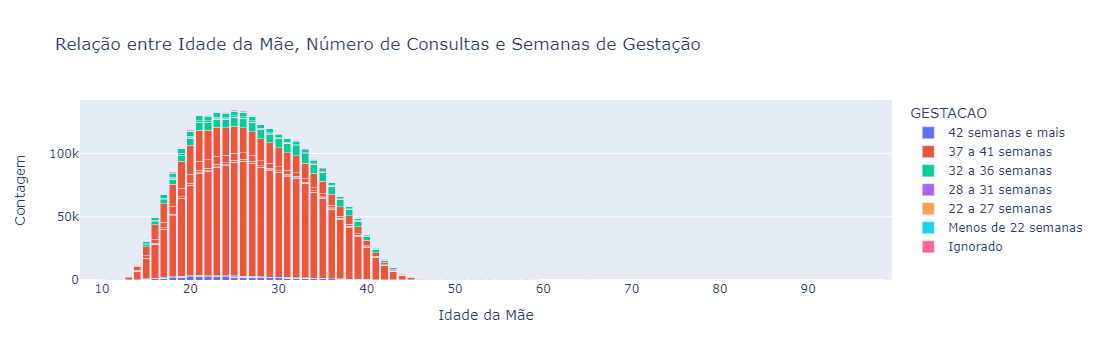

In [12]:
# Definindo o DataFrame e as colunas
df = result_df.copy()
x = 'IDADEMAE'
y = 'CONSULTAS'
hue = 'GESTACAO'

# Mapiando os rótulos descritivos para as colunas CONSULTAS e GESTACAO
consultas_labels = {
    1: 'Nenhuma',
    2: 'de 1 a 3',
    3: 'de 4 a 6',
    4: '7 e mais',
    9: 'Ignorado'
}
gestacao_labels = {
    1: 'Menos de 22 semanas',
    2: '22 a 27 semanas',
    3: '28 a 31 semanas',
    4: '32 a 36 semanas',
    5: '37 a 41 semanas',
    6: '42 semanas e mais',
    9: 'Ignorado'
}

# Atualizando as colunas CONSULTAS e GESTACAO para usar os rótulos descritivos
df[y] = df[y].map(consultas_labels)
df[hue] = df[hue].map(gestacao_labels)

# Criando um novo DataFrame com contagens das combinações de valores
pivot_df = df.groupby([x, y, hue]).size().reset_index(name='Contagem')

# Criando um gráfico de barras empilhadas com Plotly
fig = px.bar(pivot_df, x=x, y='Contagem', color=hue, barmode='stack', title='Relação entre Idade da Mãe, Número de Consultas e Semanas de Gestação', labels={x: 'Idade da Mãe', 'Contagem': 'Contagem'})
fig.show()


In [13]:
# Definindo o DataFrame e as colunas
# df = result_df.copy()
# x = 'IDADEMAE'
# y = 'CONSULTAS'
# hue = 'GESTACAO'

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='IDADEMAE', y='CONSULTAS', hue='GESTACAO', palette='viridis')
# plt.title('Relação entre Idade da Mãe, Número de Consultas e Semanas de Gestação')
# plt.show()


# pivot_df = df.pivot_table(index='GESTACAO', columns='CONSULTAS', values='IDADEMAE', aggfunc='count')
# pivot_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
# plt.title('Relação entre Semanas de Gestação e Número de Consultas de Pré-Natal')
# plt.show()

#sns.catplot(data=df, x='GESTACAO', kind='count', hue='CONSULTAS', col='IDADEMAE', col_wrap=4, height=4, aspect=1.2)


# sns.boxplot(data=df, x='CONSULTAS', y='GESTACAO')
# plt.title('Distribuição das Semanas de Gestação por Número de Consultas')
# plt.show()

# corr = df.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Mapa de Calor da Matriz de Correlação')
# plt.show()



In [14]:
result_df

LOCNASC  IDADEMAE  ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  \
0              1      18.0     4.0         NaN         0.0         1.0   
1              1      28.0     5.0         NaN         0.0         0.0   
2              1      32.0     4.0    999992.0         1.0         0.0   
3              1      25.0     3.0    999992.0         4.0         1.0   
4              1      32.0     5.0    999992.0         1.0         2.0   
...          ...       ...     ...         ...         ...         ...   
2677096        3      33.0     5.0    223115.0         1.0         0.0   
2677097        1      27.0     3.0    999992.0         2.0         0.0   
2677098        1      26.0     5.0    212415.0         0.0         0.0   
2677099        1      36.0     4.0    999992.0         2.0         1.0   
2677100        1      30.0     5.0         NaN         1.0         1.0   

         GESTACAO  GRAVIDEZ  PARTO  CONSULTAS  QTDGESTANT  QTDPARTNOR  \
0             5.0       1.0    1.0        3.0         1.0         1.0   
1             2.0       3.0    2.0        3.0         0.0         0.0   
2             4.0       1.0    2.0        4.0         1.0         0.0   
3             5.0       1.0    1.0        1.0         5.0         4.0   
4             5.0       1.0    2.0        4.0         3.0         0.0   
...           ...       ...    ...        ...         ...         ...   
2677096       5.0       1.0    1.0        4.0         1.0         1.0   
2677097       5.0       1.0    1.0        4.0         2.0         2.0   
2677098       5.0       1.0    1.0        3.0         0.0         0.0   
2677099       5.0       1.0    1.0        4.0         3.0         2.0   
2677100       5.0       1.0    1.0        4.0         2.0         2.0   

         QTDPARTCES  CONSPRENAT  STTRABPART  
0               0.0         5.0         2.0  
1               0.0         5.0         2.0  
2               1.0         7.0         2.0  
3               0.0         NaN         NaN  
4               1.0         8.0         NaN  
...             ...         ...         ...  
2677096         0.0         7.0         2.0  
2677097         0.0        11.0         9.0  
2677098         0.0         6.0         2.0  
2677099         0.0         8.0         2.0  
2677100         0.0         7.0         2.0  

[2677101 rows x 15 columns]

In [15]:
def map_gestacao(value):
    if value == 9:
        return None  # Valor ignorado, pode ser tratado como NaN
    elif value < 4:
        return 1  # Menos de 37 semanas
    else:
        return 0  # 37 semanas ou mais

# Aplicando a função à coluna 'GESTACAO'
result_df['GESTACAO'] = result_df['GESTACAO'].apply(map_gestacao)

# Removendo as linhas com valor NaN (valor ignorado)
result_df.dropna(subset=['GESTACAO'], inplace=True)

In [16]:
# Criando o imputador com a estratégia da média
imputer = SimpleImputer(strategy='mean')

# Imputando apenas as colunas que têm valores nulos
for col in result_df.columns:
    if result_df[col].dtype == 'float64' or result_df[col].dtype == 'int64':
        if result_df[col].isnull().any():
            result_df[col] = imputer.fit_transform(result_df[col].values.reshape(-1, 1))

In [17]:
# Lidando com colunas categóricas (por exemplo, ESCMAE2010)
result_df = pd.get_dummies(result_df, columns=['ESCMAE'])

In [18]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [19]:
# Define as técnicas de balanceamento com hiperparâmetros
balancing_techniques = {
    "sem_balanceamento": None,
    "SMOTE": SMOTE(sampling_strategy=0.5, random_state=42),
    "NearMiss": NearMiss(sampling_strategy='majority', version=3, n_neighbors=3)
}

# Escolha a técnica de balanceamento desejada
selected_balancing = "SMOTE-ENN"  # Substitua pelo método de balanceamento desejado

In [20]:
# Defina o conjunto de dados e a variável alvo
X = result_df.drop('GESTACAO', axis=1)
y = result_df['GESTACAO']


In [21]:
# Divida os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Defina os modelos com hiperparâmetros
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=2, metric='minkowski')
}



In [23]:
# Função para treinar e prever com a técnica de balanceamento escolhida
def train_and_predict(model, balancing_technique, X_train, y_train, X_test):
    if balancing_technique is not None:
        X_train_resampled, y_train_resampled = balancing_technique.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    return y_pred

In [24]:
# Dicionários para armazenar os resultados
roc_auc_results = {}
confusion_matrices_results = {}

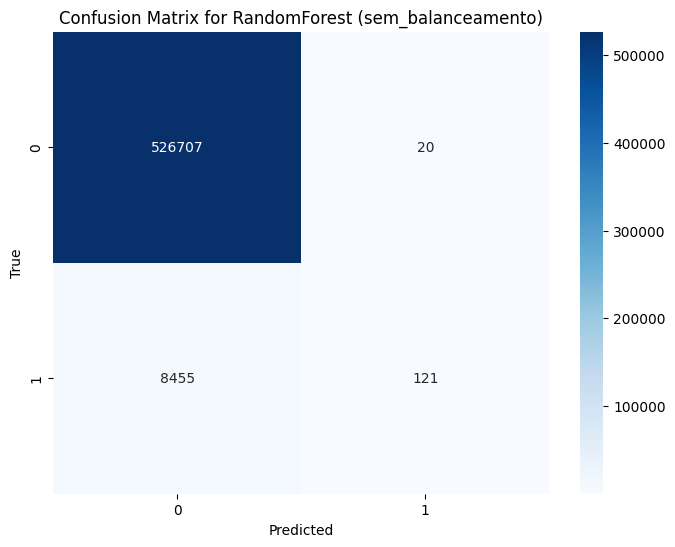

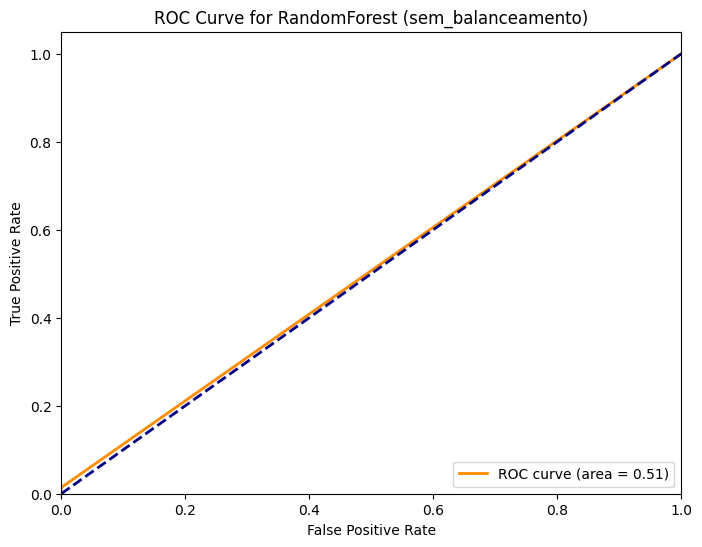

Model: RandomForest, Balancing: sem_balanceamento
Accuracy: 0.9841678451269654
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    526727
         1.0       0.86      0.01      0.03      8576

    accuracy                           0.98    535303
   macro avg       0.92      0.51      0.51    535303
weighted avg       0.98      0.98      0.98    535303



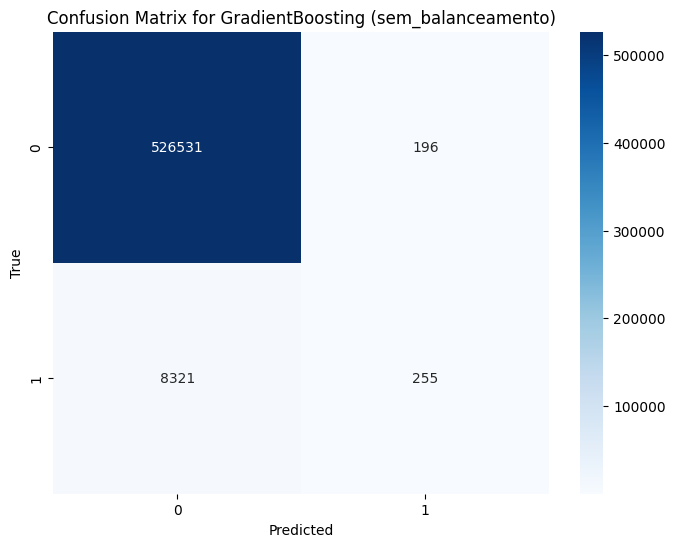

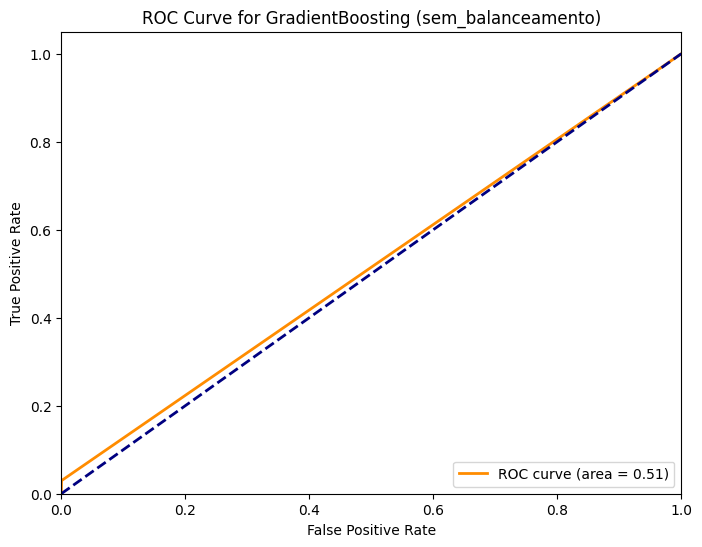

Model: GradientBoosting, Balancing: sem_balanceamento
Accuracy: 0.9840893848904265
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    526727
         1.0       0.57      0.03      0.06      8576

    accuracy                           0.98    535303
   macro avg       0.77      0.51      0.52    535303
weighted avg       0.98      0.98      0.98    535303



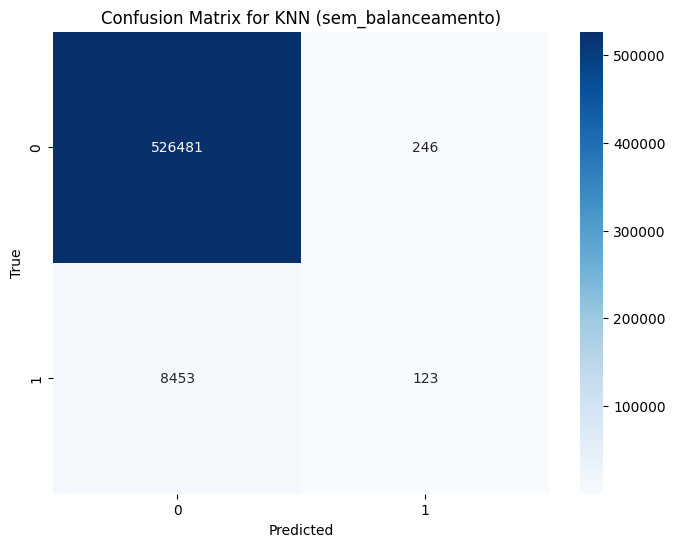

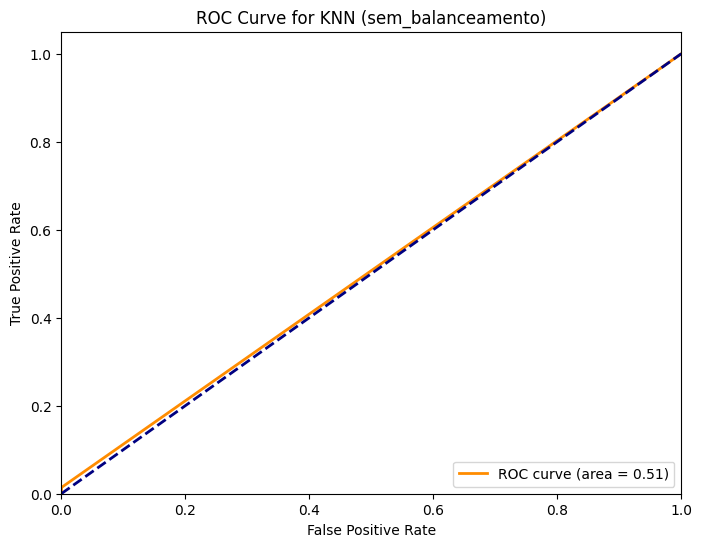

Model: KNN, Balancing: sem_balanceamento
Accuracy: 0.9837493905320912
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    526727
         1.0       0.33      0.01      0.03      8576

    accuracy                           0.98    535303
   macro avg       0.66      0.51      0.51    535303
weighted avg       0.97      0.98      0.98    535303



In [25]:
selected_balancing = "sem_balanceamento" 
# Paralelize o treinamento e previsão de modelos
with joblib.Parallel(n_jobs=-1) as parallel:
    results = parallel(
        joblib.delayed(train_and_predict)(model, balancing_techniques[selected_balancing], X_train, y_train, X_test)
        for model_name, model in models.items()
    )

# Loop para exibir os resultados e armazenar as métricas
for model_name, y_pred in zip(models.keys(), results):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Armazene o valor da roc_auc no dicionário
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_results[(model_name, selected_balancing)] = roc_auc

    # Armazene a matriz de confusão no dicionário
    confusion_matrices_results[(model_name, selected_balancing)] = matrix

    # Exibir a matriz de confusão em um gráfico
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {model_name} ({selected_balancing})")
    plt.show()

    # Calcular e exibir a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name} ({selected_balancing})")
    plt.legend(loc="lower right")
    plt.show()

    print(f"Model: {model_name}, Balancing: {selected_balancing}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

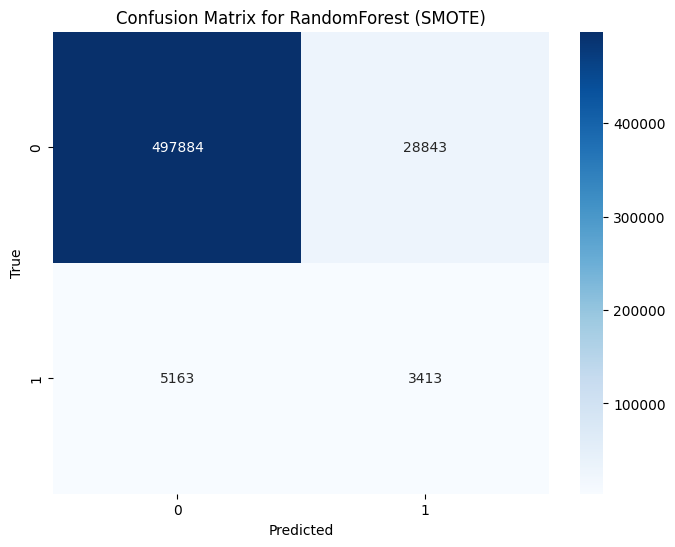

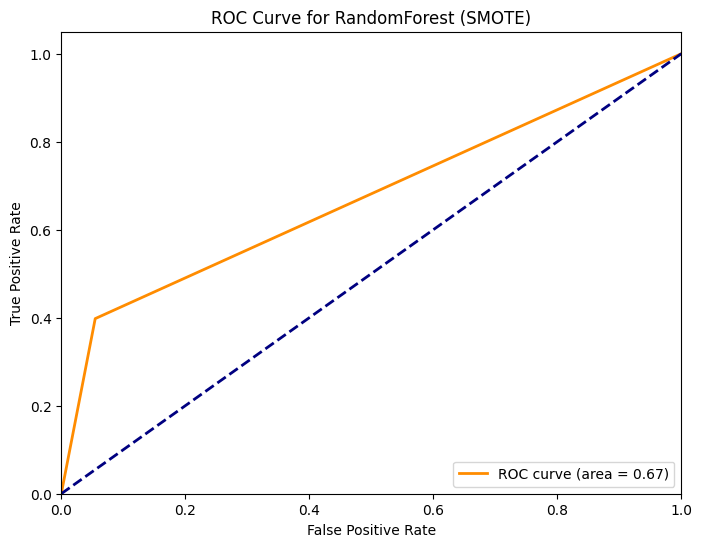

Model: RandomForest, Balancing: SMOTE
Accuracy: 0.9364733618156446
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    526727
         1.0       0.11      0.40      0.17      8576

    accuracy                           0.94    535303
   macro avg       0.55      0.67      0.57    535303
weighted avg       0.98      0.94      0.95    535303



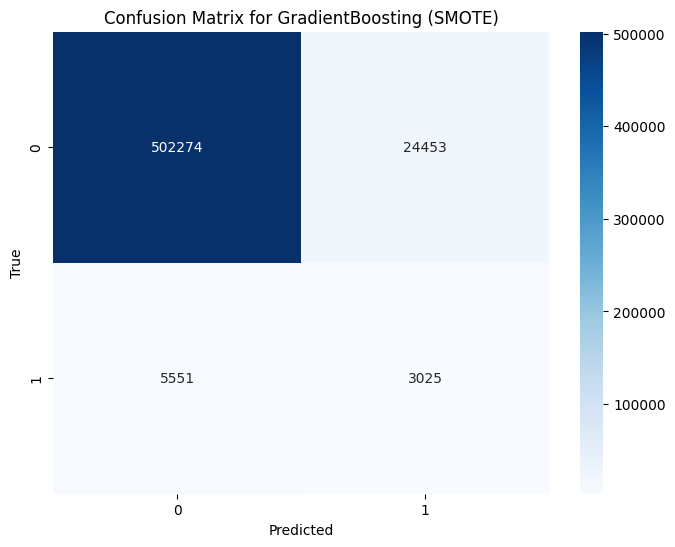

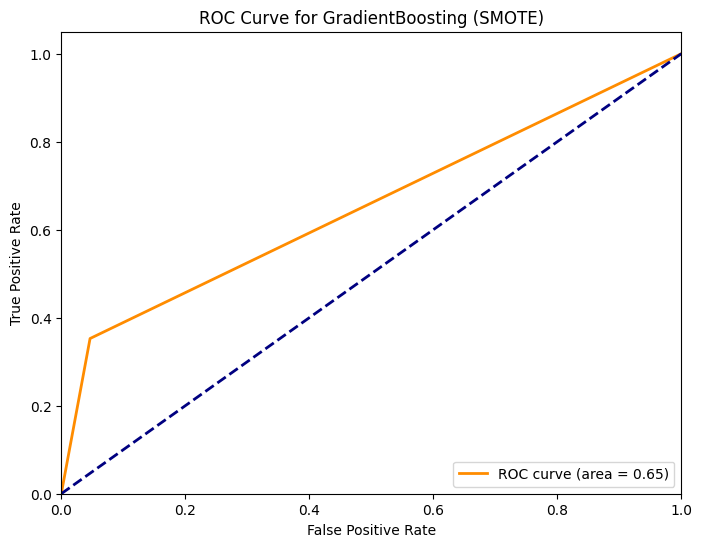

Model: GradientBoosting, Balancing: SMOTE
Accuracy: 0.9439495014972829
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    526727
         1.0       0.11      0.35      0.17      8576

    accuracy                           0.94    535303
   macro avg       0.55      0.65      0.57    535303
weighted avg       0.97      0.94      0.96    535303



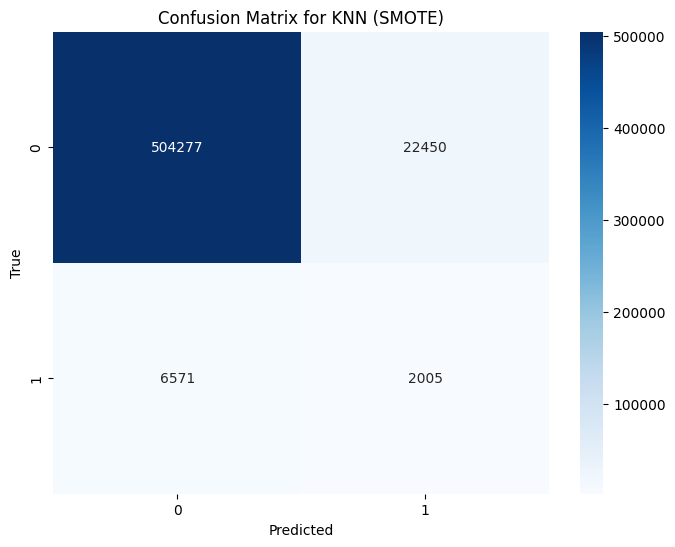

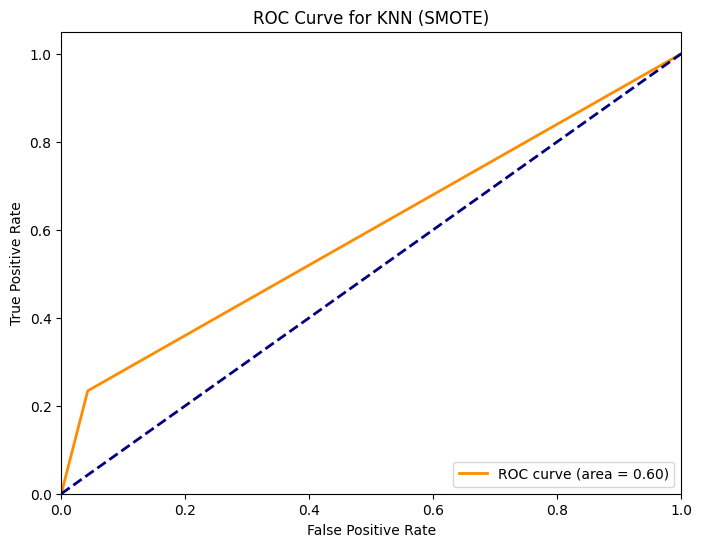

Model: KNN, Balancing: SMOTE
Accuracy: 0.9457858446524678
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    526727
         1.0       0.08      0.23      0.12      8576

    accuracy                           0.95    535303
   macro avg       0.53      0.60      0.55    535303
weighted avg       0.97      0.95      0.96    535303



In [26]:
selected_balancing = "SMOTE" 
# Paralelize o treinamento e previsão de modelos
with joblib.Parallel(n_jobs=-1) as parallel:
    results = parallel(
        joblib.delayed(train_and_predict)(model, balancing_techniques[selected_balancing], X_train, y_train, X_test)
        for model_name, model in models.items()
    )

# Loop para exibir os resultados e armazenar as métricas
for model_name, y_pred in zip(models.keys(), results):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Armazene o valor da roc_auc no dicionário
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_results[(model_name, selected_balancing)] = roc_auc

    # Armazene a matriz de confusão no dicionário
    confusion_matrices_results[(model_name, selected_balancing)] = matrix

    # Exibir a matriz de confusão em um gráfico
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {model_name} ({selected_balancing})")
    plt.show()

    # Calcular e exibir a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name} ({selected_balancing})")
    plt.legend(loc="lower right")
    plt.show()

    print(f"Model: {model_name}, Balancing: {selected_balancing}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

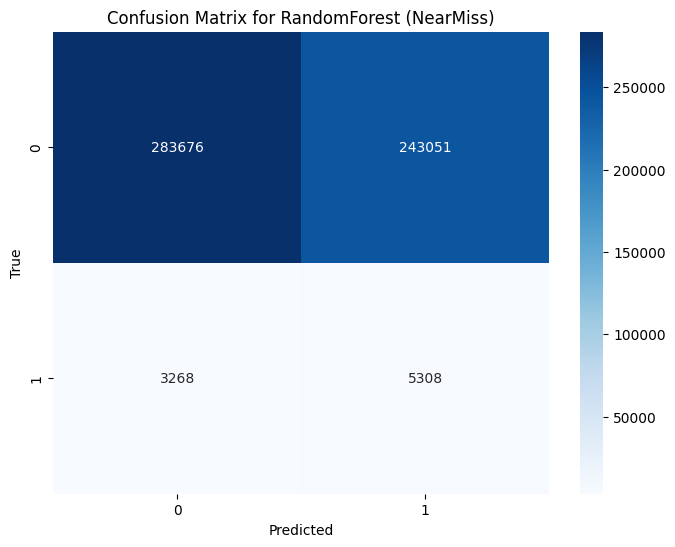

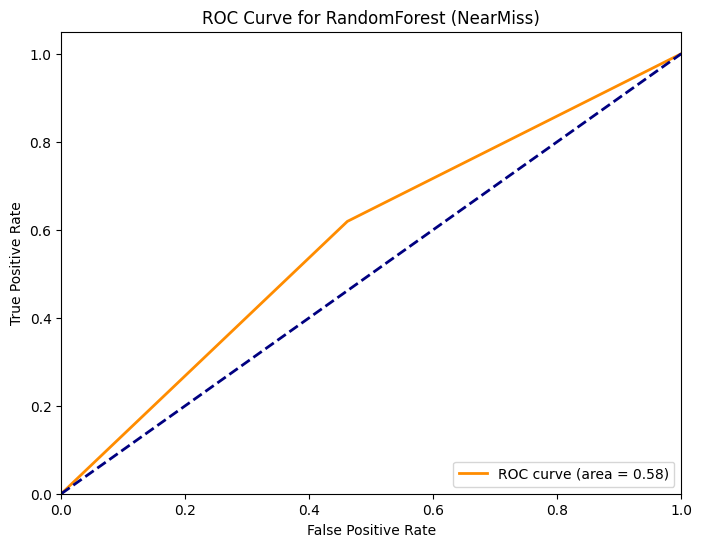

Model: RandomForest, Balancing: NearMiss
Accuracy: 0.5398512618087327
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.54      0.70    526727
         1.0       0.02      0.62      0.04      8576

    accuracy                           0.54    535303
   macro avg       0.50      0.58      0.37    535303
weighted avg       0.97      0.54      0.69    535303



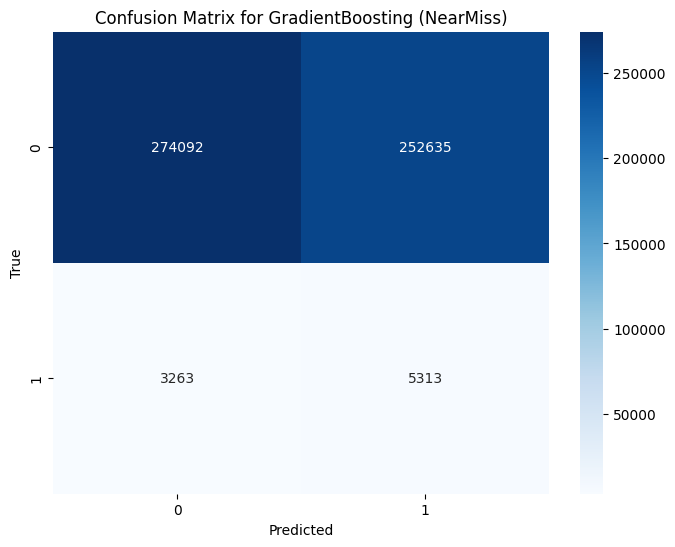

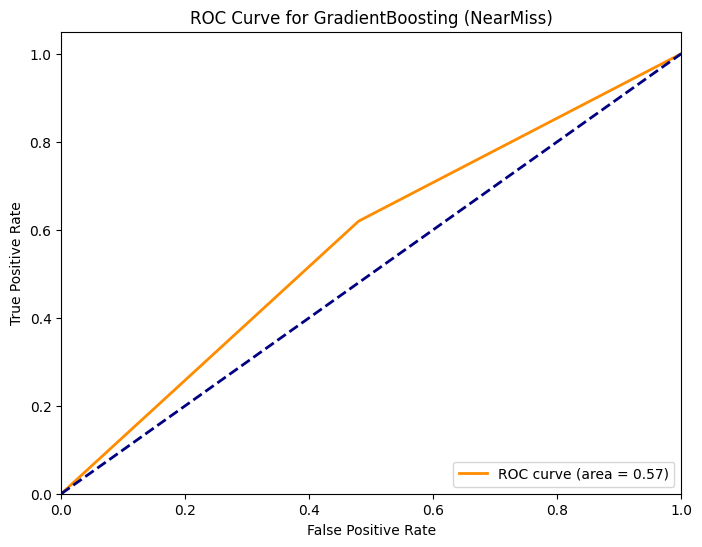

Model: GradientBoosting, Balancing: NearMiss
Accuracy: 0.5219567235752461
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.52      0.68    526727
         1.0       0.02      0.62      0.04      8576

    accuracy                           0.52    535303
   macro avg       0.50      0.57      0.36    535303
weighted avg       0.97      0.52      0.67    535303



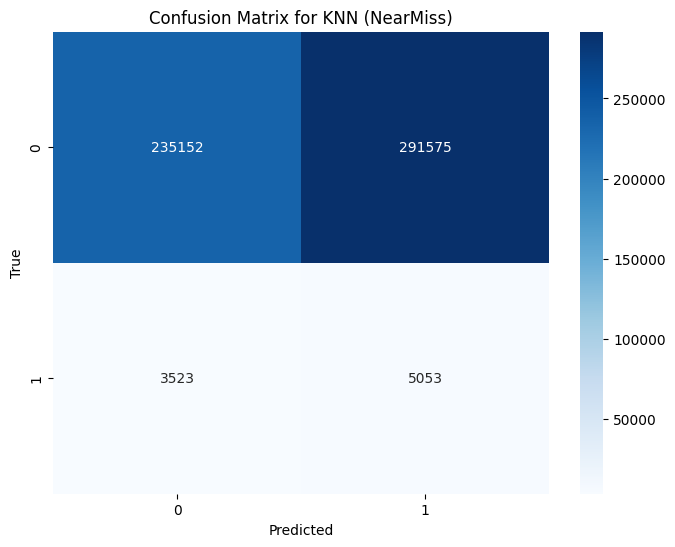

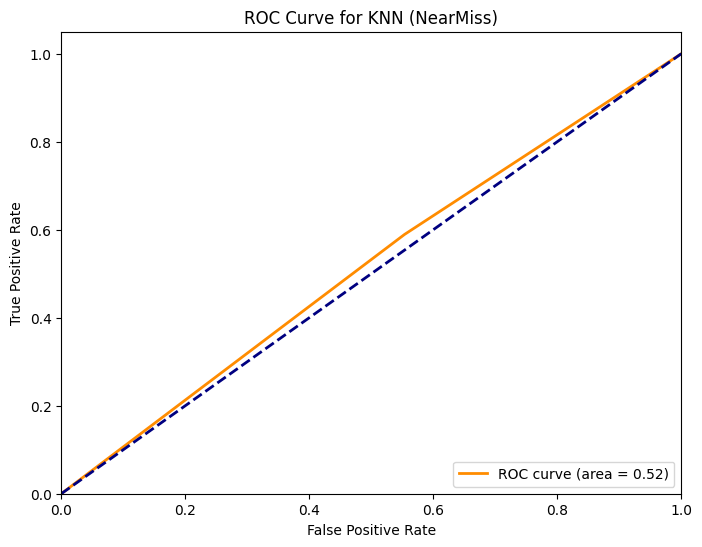

Model: KNN, Balancing: NearMiss
Accuracy: 0.44872716947224284
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.45      0.61    526727
         1.0       0.02      0.59      0.03      8576

    accuracy                           0.45    535303
   macro avg       0.50      0.52      0.32    535303
weighted avg       0.97      0.45      0.61    535303



In [27]:
selected_balancing = "NearMiss" 
# Paralelize o treinamento e previsão de modelos
with joblib.Parallel(n_jobs=-1) as parallel:
    results = parallel(
        joblib.delayed(train_and_predict)(model, balancing_techniques[selected_balancing], X_train, y_train, X_test)
        for model_name, model in models.items()
    )

# Loop para exibir os resultados e armazenar as métricas
for model_name, y_pred in zip(models.keys(), results):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Armazene o valor da roc_auc no dicionário
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_results[(model_name, selected_balancing)] = roc_auc

    # Armazene a matriz de confusão no dicionário
    confusion_matrices_results[(model_name, selected_balancing)] = matrix

    # Exibir a matriz de confusão em um gráfico
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {model_name} ({selected_balancing})")
    plt.show()

    # Calcular e exibir a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name} ({selected_balancing})")
    plt.legend(loc="lower right")
    plt.show()

    print(f"Model: {model_name}, Balancing: {selected_balancing}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

In [28]:
confusion_matrices_results 

{('RandomForest',
  'sem_balanceamento'): array([[526707,     20],
        [  8455,    121]], dtype=int64),
 ('GradientBoosting',
  'sem_balanceamento'): array([[526531,    196],
        [  8321,    255]], dtype=int64),
 ('KNN',
  'sem_balanceamento'): array([[526481,    246],
        [  8453,    123]], dtype=int64),
 ('RandomForest',
  'SMOTE'): array([[497884,  28843],
        [  5163,   3413]], dtype=int64),
 ('GradientBoosting',
  'SMOTE'): array([[502274,  24453],
        [  5551,   3025]], dtype=int64),
 ('KNN',
  'SMOTE'): array([[504277,  22450],
        [  6571,   2005]], dtype=int64),
 ('RandomForest',
  'NearMiss'): array([[283676, 243051],
        [  3268,   5308]], dtype=int64),
 ('GradientBoosting',
  'NearMiss'): array([[274092, 252635],
        [  3263,   5313]], dtype=int64),
 ('KNN',
  'NearMiss'): array([[235152, 291575],
        [  3523,   5053]], dtype=int64)}

In [29]:
roc_auc_results 

{('RandomForest', 'sem_balanceamento'): 0.5070355857286333,
 ('GradientBoosting', 'sem_balanceamento'): 0.5146810162600092,
 ('KNN', 'sem_balanceamento'): 0.5069376578203982,
 ('RandomForest', 'SMOTE'): 0.6716060826156467,
 ('GradientBoosting', 'SMOTE'): 0.65315205809109,
 ('KNN', 'SMOTE'): 0.5955851389729447,
 ('RandomForest', 'NearMiss'): 0.5787500937038415,
 ('GradientBoosting', 'NearMiss'): 0.56994391292461,
 ('KNN', 'NearMiss'): 0.5178212109019614}